In [388]:
import pandas as pd
import dtale
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


In [383]:
df_train = pd.read_csv(r"C:\Users\natal\Downloads\hackaton_students_train.csv")
df_test = pd.read_csv(r"C:\Users\natal\Downloads\hackaton_students_test.csv")

In [393]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(df_train.drop(columns=["clicked"]), df_train.clicked)

ValueError: could not convert string to float: 'TBS'

In [327]:
df_train['design_category'] = df_train[['graphic_design', 'top_1_section',
       'top_2_section', 'top_3_section']].astype(str).agg('_'.join, axis=1).astype('category').cat.codes

In [328]:
print(df_train.isna().sum()/df_train.shape[0])

id                                  0.000000
booking_adult_count                 0.000000
booking_child_count                 0.000000
booking_destination_airport_code    0.061201
booking_id                          0.000000
booking_infant_count                0.000000
booking_leg_count                   0.000000
booking_market                      0.000000
booking_origin_airport_code         0.000000
booking_original_currency           0.086146
booking_pax_count                   0.000000
booking_payment_method              0.000000
booking_reservation_month           0.000000
booking_sales_channel               0.000000
booking_segments_count              0.000000
booking_trip_type                   0.000000
booking_window_w                    0.000000
coupon_cabin_class                  0.000000
coupon_destination_airport_code     0.000000
coupon_fare_basis                   0.000000
coupon_marketing_flight_number      0.000000
coupon_miles                        0.000000
coupon_num

In [329]:
df_train[df_train.booking_adult_count==45]

,id,booking_adult_count,booking_child_count,booking_destination_airport_code,booking_id,booking_infant_count,booking_leg_count,booking_market,booking_origin_airport_code,booking_original_currency,...,pnr,preffered_language,request_dttm,request_id,clicked,graphic_design,top_1_section,top_2_section,top_3_section,design_category
3535,26100,45,0,FCO,4068855,0,2,PL,GDN,NaN,...,f3ab9e6c14ee440398c2256d6ad26227,pl_pl,2013-10-07T13:10:43.902Z,1aaa9a0716ef44eebe5656adbeb0c32b,1,A,1,2,3,0
13241,106210,45,0,FCO,2886836,0,2,PL,WAW,NaN,...,6034a63f623b45c0ad77733858c44c88,en_gb,2014-03-04T10:20:13.515Z,2de790e032cc4d43ab2fa274f0e32130,0,B,4,5,3,7
67235,27049,45,0,BCN,7565514,0,2,PL,GDN,NaN,...,56a83e3aab3645c982711ec9138fd610,en_gb,2013-10-08T07:11:48.127Z,4dba1829c7c740eabf17980154d673d6,0,B,4,5,3,7


In [330]:
df_train.groupby('design_category')['clicked'].agg(['count', 'sum', 'mean']).rename(columns={
    'count': 'total_shown',
    'sum': 'total_clicked',
    'mean': 'CTR'
})

,total_shown,total_clicked,CTR
design_category,,,
0,8524,2805,0.329071
1,8432,2781,0.329815
2,8511,2879,0.338268
3,8423,2663,0.316158
4,8480,2764,0.325943
5,8512,2788,0.327538
6,8586,2861,0.333217
7,8536,2825,0.330951
8,8527,2748,0.322270


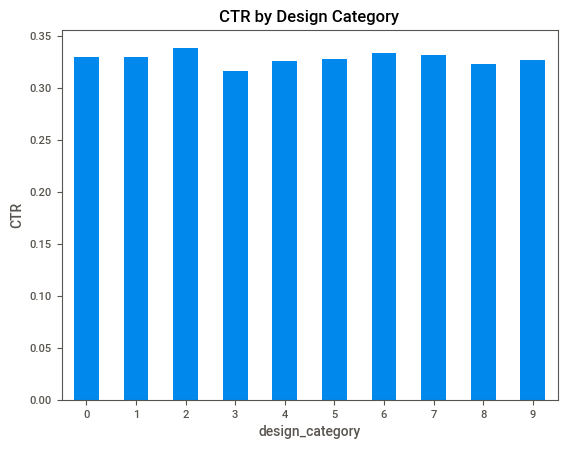

In [331]:
design_ctr = df_train.groupby('design_category')['clicked'].mean()

design_ctr.plot(kind='bar', title='CTR by Design Category', ylabel='CTR')
plt.xticks(rotation=0)
plt.show()

In [332]:
df_train.groupby('design_category')[[
    'booking_adult_count', 'booking_child_count', 'booking_infant_count',
]].mean()

,booking_adult_count,booking_child_count,booking_infant_count
design_category,,,
0,1.454951,0.056664,0.012905
1,1.469758,0.057875,0.012690
2,1.440371,0.057925,0.012219
3,1.434406,0.055681,0.013653
4,1.458844,0.059670,0.013797
5,1.469572,0.061090,0.011631
6,1.458770,0.060913,0.012229
7,1.489222,0.060098,0.012887
8,1.495133,0.056409,0.010789


In [333]:
df_train.groupby(['design_category', 'booking_trip_type'])['clicked'].mean().unstack()

booking_trip_type,MC,OW,RT
design_category,,,
0,0.321970,0.317379,0.334018
1,0.352941,0.314450,0.333276
2,0.369048,0.332726,0.337691
3,0.318095,0.311516,0.317593
4,0.364151,0.310264,0.328184
5,0.356215,0.310509,0.331005
6,0.385932,0.316468,0.334451
7,0.323413,0.324138,0.333889
8,0.350806,0.327977,0.317836


In [334]:
top_markets = df_train['booking_market'].value_counts().head(5).index
df_train[df_train['booking_market'].isin(top_markets)].groupby(
    ['design_category', 'booking_market']
)['clicked'].mean().unstack()


booking_market,DE,GB,PL,SE,US
design_category,,,,,
0,0.405941,0.333333,0.325016,0.333333,0.389728
1,0.337461,0.334311,0.306641,0.339540,0.396777
2,0.338926,0.348348,0.323375,0.321656,0.410896
3,0.337349,0.310897,0.296236,0.322928,0.369877
4,0.310219,0.323699,0.312782,0.315676,0.394450
5,0.368932,0.351351,0.313112,0.322162,0.379592
6,0.374603,0.344444,0.319627,0.330128,0.395233
7,0.320261,0.348525,0.314780,0.319005,0.391039
8,0.359060,0.319149,0.294395,0.341826,0.377264


In [335]:
df_train.groupby(['design_category', 'booking_reservation_month'])['clicked'].mean().unstack()

booking_reservation_month,1,2,3,4,5,6,7,8,9,10,11,12
design_category,,,,,,,,,,,,
0,0.287918,0.241304,0.285714,0.352564,0.402010,0.386431,0.396552,0.339033,0.332588,0.317682,0.326331,0.303150
1,0.267275,0.257471,0.325758,0.418750,0.398190,0.405248,0.358491,0.365820,0.323131,0.334862,0.323099,0.247934
2,0.289062,0.240741,0.389706,0.365672,0.367876,0.432927,0.391478,0.332864,0.355971,0.354294,0.307588,0.288660
3,0.246518,0.216036,0.401460,0.425676,0.444444,0.376582,0.352697,0.347764,0.314396,0.311094,0.281525,0.286290
4,0.274639,0.245119,0.427481,0.352941,0.403587,0.377709,0.390476,0.345965,0.329310,0.319759,0.293716,0.275154
5,0.283333,0.292411,0.328767,0.381295,0.401015,0.398089,0.380244,0.319595,0.324111,0.332326,0.313187,0.308489
6,0.269424,0.315315,0.317073,0.400000,0.377049,0.422492,0.361702,0.337159,0.337486,0.348281,0.312076,0.274841
7,0.276265,0.258947,0.324841,0.423841,0.360577,0.420245,0.406504,0.359886,0.323766,0.331183,0.300847,0.254902
8,0.273585,0.249462,0.360656,0.393333,0.343478,0.365079,0.354967,0.349965,0.335393,0.314202,0.297568,0.271949


i = [0,1,2,3,4,5,6,7,8,9]

P(click | design=i)

> One model per design - 10 simple binary classifications

> Multi Treatment Uplift Modeling?????


In [336]:
df_train['if_economy'] = (df_train['coupon_cabin_class'] == 'economy').astype(int)
df_train['if_long_flight'] = (df_train['coupon_range'] == 'LH').astype(int)

In [337]:
bins = [-1, 5, 8, 11, 16, 20, 23] 
labels = ['late_night', 'early_morning', 'morning', 'afternoon', 'evening', 'night']

df_train['departure_hour_interval'] = pd.cut(df_train['leg_departure_hour'], bins=bins, labels=labels)
df_train['arrival_hour_interval'] = pd.cut(df_train['leg_arrival_hour'], bins=bins, labels=labels)

In [339]:
df_train_expert = df_train[["booking_adult_count",
"booking_child_count",
"if_long_flight",
"if_economy",
"departure_hour_interval",
"arrival_hour_interval",
"booking_window_w",
"design_category",
"clicked"]]
df_train_expert

,booking_adult_count,booking_child_count,if_long_flight,if_economy,departure_hour_interval,arrival_hour_interval,booking_window_w,design_category,clicked
0,1,0,0,1,late_night,early_morning,4,9,0
1,1,0,1,1,evening,evening,2,6,1
2,1,0,0,1,afternoon,evening,0,8,0
3,1,0,1,1,afternoon,late_night,0,2,1
4,1,0,0,1,evening,late_night,9,4,1
...,...,...,...,...,...,...,...,...,...
84944,1,0,1,1,afternoon,evening,2,6,1
84945,1,0,1,1,afternoon,morning,36,4,1
84946,2,0,1,1,early_morning,afternoon,15,8,1
84947,2,0,0,1,evening,night,3,3,0


In [340]:
df_train_expert.design_category.info

<bound method Series.info of 0        9
1        6
2        8
3        2
4        4
        ..
84944    6
84945    4
84946    8
84947    3
84948    6
Name: design_category, Length: 84949, dtype: int8>

In [341]:
ohe = OneHotEncoder(sparse_output=False)

ohe_data = ohe.fit_transform(df_train_expert.select_dtypes("category")) 
ohe_df = pd.DataFrame(data=ohe_data, columns=ohe.get_feature_names_out())
df_train_expert = pd.concat([df_train_expert.select_dtypes(exclude="category"), ohe_df], axis=1)

df_train_expert

,booking_adult_count,booking_child_count,if_long_flight,if_economy,booking_window_w,design_category,clicked,departure_hour_interval_afternoon,departure_hour_interval_early_morning,departure_hour_interval_evening,departure_hour_interval_late_night,departure_hour_interval_morning,departure_hour_interval_night,arrival_hour_interval_afternoon,arrival_hour_interval_early_morning,arrival_hour_interval_evening,arrival_hour_interval_late_night,arrival_hour_interval_morning,arrival_hour_interval_night
0,1,0,0,1,4,9,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,1,1,2,6,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,0,1,0,8,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,1,9,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84944,1,0,1,1,2,6,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
84945,1,0,1,1,36,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84946,2,0,1,1,15,8,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
84947,2,0,0,1,3,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [342]:
df_train_expert.design_category = df_train_expert.design_category.astype('category')

In [343]:
df_test['if_economy'] = (df_test['coupon_cabin_class'] == 'economy').astype(int)
df_test['if_long_flight'] = (df_test['coupon_range'] == 'LH').astype(int)
bins = [-1, 5, 8, 11, 16, 20, 23] 
labels = ['late_night', 'early_morning', 'morning', 'afternoon', 'evening', 'night']

df_test['departure_hour_interval'] = pd.cut(df_test['leg_departure_hour'], bins=bins, labels=labels)
df_test['arrival_hour_interval'] = pd.cut(df_test['leg_arrival_hour'], bins=bins, labels=labels)

In [344]:
ohe_data = ohe.fit_transform(df_test.select_dtypes("category")) 
ohe_df = pd.DataFrame(data=ohe_data, columns=ohe.get_feature_names_out())
df_test = pd.concat([df_test.select_dtypes(exclude="category"), ohe_df], axis=1)

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# accuracy_score(y_val_CART, tree.predict(X_val_CART)) for tree in imdb_trees]

X_train, X_test, y_train, y_test = train_test_split(
    df_train_expert.drop(columns='clicked'), df_train_expert.clicked, train_size=0.6, random_state=42
)

In [373]:
uplift_scores = {}
for design in df_train_expert['design_category'].unique():
    print(f"Design {design}...")
    treated = X_train[X_train['design_category'] == design]
    X_treated = treated.drop(columns=["design_category"])
    y_treated = y_train.loc[treated.index]

    control = X_train[X_train['design_category'] != design]
    X_control = control.drop(columns=["design_category"])
    y_control = y_train.loc[control.index]

    X_test_treated = X_test[X_test['design_category'] == design]
    y_test_treated = y_test.loc[X_test_treated.index]

    X_test_control = X_test[X_test['design_category'] != design]
    y_test_control = y_test.loc[X_test_control.index]

    model_treated = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_treated, y_treated)
    model_control = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_control, y_control)

    print(f"Accuracy for model_treated: {accuracy_score(y_test_treated, model_treated.predict(X_test_treated.drop(columns="design_category")))}")
    print(f"Accuracy for model_control: {accuracy_score(y_test_control, model_control.predict(X_test_control.drop(columns="design_category")))}")

    p_treated = model_treated.predict_proba(df_test[df_train_expert.drop(columns=["clicked", "design_category"]).columns])[:, 1]
    p_control = model_control.predict_proba(df_test[df_train_expert.drop(columns=["clicked", "design_category"]).columns])[:, 1]

    uplift_scores[design] = p_treated - p_control

uplift_df = pd.DataFrame(uplift_scores)
df_test['best_design'] = uplift_df.idxmax(axis=1)
df_test['estimated_uplift'] = uplift_df.max(axis=1)

Design 9...
Accuracy for model_treated: 0.6578014184397163
Accuracy for model_control: 0.6731272061707413
Design 6...
Accuracy for model_treated: 0.664187643020595
Accuracy for model_control: 0.6727463587455714
Design 8...
Accuracy for model_treated: 0.6670510233496685
Accuracy for model_control: 0.6732981547638557
Design 2...
Accuracy for model_treated: 0.6550802139037433
Accuracy for model_control: 0.6745279937283596
Design 4...
Accuracy for model_treated: 0.6685212298682284
Accuracy for model_control: 0.6726320955341076
Design 3...
Accuracy for model_treated: 0.6883928571428571
Accuracy for model_control: 0.67050947093403
Design 0...
Accuracy for model_treated: 0.6611423498076354
Accuracy for model_control: 0.6730172216594229
Design 5...
Accuracy for model_treated: 0.6635958395245171
Accuracy for model_control: 0.6734280581414339
Design 7...
Accuracy for model_treated: 0.6614692653673163
Accuracy for model_control: 0.6730298580518845
Design 1...
Accuracy for model_treated: 0.6572852

In [378]:
uplift_df

,9,6,8,2,4,3,0,5,7,1
0,-0.037978,0.042671,-0.000168,0.019275,-0.026397,-0.008470,0.015426,0.033762,-0.064956,0.035452
1,-0.035419,0.059932,-0.022217,-0.014962,0.018572,0.032847,0.015260,-0.034931,0.002310,-0.035002
2,-0.009702,0.037045,-0.000254,0.006009,0.013945,-0.014606,-0.005081,-0.030254,0.008073,-0.013572
3,0.045163,0.129875,-0.042846,-0.050316,-0.065597,0.034814,0.247487,-0.100039,-0.064586,-0.062207
4,0.107433,0.023275,-0.315906,-0.300827,0.293118,-0.195708,-0.234817,-0.195585,0.089135,0.227575
...,...,...,...,...,...,...,...,...,...,...
9434,-0.229917,-0.312269,0.066395,-0.201569,-0.148669,0.077858,0.081835,0.042219,0.305806,0.185726
9435,0.046541,-0.058949,-0.032476,0.087553,-0.017074,-0.029834,-0.029628,-0.089703,0.132167,-0.033235
9436,0.107887,-0.167007,-0.118582,-0.121905,-0.046259,-0.070663,0.087392,0.222387,-0.097772,-0.034869
9437,-0.084922,-0.051392,0.079419,0.010900,0.026386,-0.141478,-0.047379,0.055335,0.061679,0.084017


In [379]:
df_test

,id,booking_adult_count,booking_child_count,booking_destination_airport_code,booking_id,booking_infant_count,booking_leg_count,booking_market,booking_origin_airport_code,booking_original_currency,...,departure_hour_interval_morning,departure_hour_interval_night,arrival_hour_interval_afternoon,arrival_hour_interval_early_morning,arrival_hour_interval_evening,arrival_hour_interval_late_night,arrival_hour_interval_morning,arrival_hour_interval_night,best_design,estimated_uplift
0,42942,1,0,WAW,7158728,0,2,CZ,PRG,CZK,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.042671
1,46065,1,0,SKP,4665455,0,2,PL,WAW,PLN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.059932
2,96229,1,0,LHR,6954615,0,2,EE,TLL,EUR,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0.037045
3,1375,1,1,WAW,1436103,0,2,PL,CDG,PLN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.247487
4,68819,2,0,MIA,6578150,0,2,PL,WAW,PLN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.293118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,5238,1,2,ORD,7159884,0,1,PL,KRK,PLN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0.305806
9435,13487,2,0,WAW,3969433,0,2,NO,OSL,NOK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,0.132167
9436,45547,1,0,NaN,7696142,0,2,CA,YYZ,CAD,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,0.222387
9437,108664,1,0,NCE,7489934,0,2,PL,WAW,PLN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.084017


In [375]:
df_test[df_test["estimated_uplift"]>0]

,id,booking_adult_count,booking_child_count,booking_destination_airport_code,booking_id,booking_infant_count,booking_leg_count,booking_market,booking_origin_airport_code,booking_original_currency,...,departure_hour_interval_morning,departure_hour_interval_night,arrival_hour_interval_afternoon,arrival_hour_interval_early_morning,arrival_hour_interval_evening,arrival_hour_interval_late_night,arrival_hour_interval_morning,arrival_hour_interval_night,best_design,estimated_uplift
0,42942,1,0,WAW,7158728,0,2,CZ,PRG,CZK,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.042671
1,46065,1,0,SKP,4665455,0,2,PL,WAW,PLN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.059932
2,96229,1,0,LHR,6954615,0,2,EE,TLL,EUR,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0.037045
3,1375,1,1,WAW,1436103,0,2,PL,CDG,PLN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.247487
4,68819,2,0,MIA,6578150,0,2,PL,WAW,PLN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.293118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,5238,1,2,ORD,7159884,0,1,PL,KRK,PLN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0.305806
9435,13487,2,0,WAW,3969433,0,2,NO,OSL,NOK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,0.132167
9436,45547,1,0,NaN,7696142,0,2,CA,YYZ,CAD,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,0.222387
9437,108664,1,0,NCE,7489934,0,2,PL,WAW,PLN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.084017
